# ML Lab Week1 by Smeet Dedhia 200968236
## Exercise 2

### MetaData:

Number of Instances: 506

Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

Attribute Information:

1. CRIM  per capita crime rate by town
2. ZN    proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX   nitric oxides concentration (parts per 10 million)
6. RM    average number of rooms per dwelling
7. AGE   proportion of owner-occupied units built prior to 1940
8. DIS   weighted distances to five Boston employment centres
9. RAD   index of accessibility to radial highways
10. TAX  full-value property-tax rate per $10,000

11. PTRATIO  pupil-teacher ratio by town
12. B      1000(Bk - 0.63)^2 where Bk= the proportion of blacks per town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's


   

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

### 1. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’.

In [2]:
df1 = pd.read_csv("boston.csv")
#dropping invalid columns
df1=df1.drop("Unnamed: 0",axis=1)
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#checking for null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


No Missing Values

In [4]:
#correlation between MEDV and other attributes
corr=df1.corr()
corr.medv.sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

<AxesSubplot:>

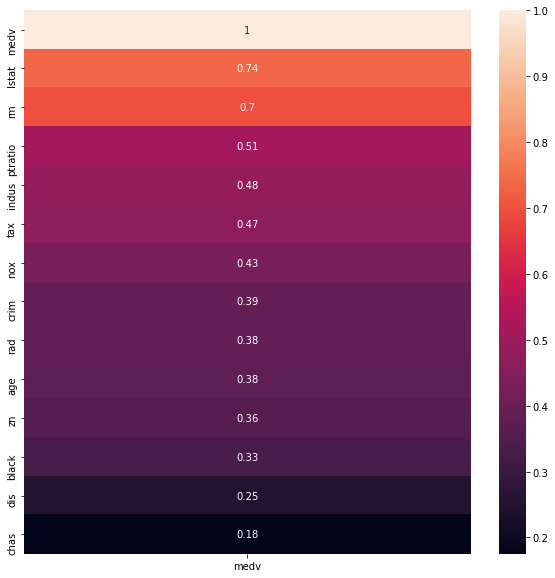

In [5]:
#Absolute correlation coefficient for identifying top 5 features
corr2 = pd.DataFrame(df1.corr()['medv'].abs().sort_values(ascending=False))
plt.figure(figsize=(10,10))
sns.heatmap(corr2,annot=True)

From the heatmap, the 5 best features to predict 'MEDV' are lstat, rm, ptratio, indus and tax

### 2.Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3 features.  (from sklearn.linear_model import LinearRegression) 

In [6]:
best4 = df1[['lstat','rm','ptratio', 'indus']]
target = df1[['medv']]

x_train,x_test,y_train,y_test=train_test_split(best4,target,test_size=0.2,random_state=45)

reg = LinearRegression()
reg.fit(x_train, y_train)
print("Regression Coefficients")
reg.coef_

Regression Coefficients


array([[-0.56029438,  4.55404297, -0.83582664, -0.01548299]])

In [7]:
#Predicted MEDV
y_pred = reg.predict(x_test)
y_pred[0:5]

array([[ 8.74427884],
       [28.76176457],
       [24.57820232],
       [22.14121956],
       [34.65459736]])

In [8]:
#Comparing predicted MEDV with Actual MEDV
y_test.head()

,medv
48,14.4
64,33.0
473,29.8
485,21.2
228,46.7


### 3.Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

In [10]:
#RMSE
print("RMSE")
np.sqrt(mean_squared_error(y_pred,y_test))

RMSE


5.685423559542613

In [12]:
#R2
print("R2:")
reg.score(x_test,y_test)*100

R2:


70.0919256619853

From the above value, we can say that our model is around 70% accurate